## Exponential Moving Average

In [1]:
# This code imports the data you generated before for replicating.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


diff_T = pd.read_csv('diff_T.csv')
diff_T = diff_T.set_index('timestamp')

In [2]:
split = int(len(diff_T.values)*0.95)
diff_train_T = diff_T.iloc[:split]
diff_test_T = diff_T.iloc[split:]

In [3]:
short_exp_moving_average_T = diff_T.ewm(span=4,adjust=False).mean()
long_exp_moving_average_T = diff_T.ewm(span=13,adjust=False).mean()

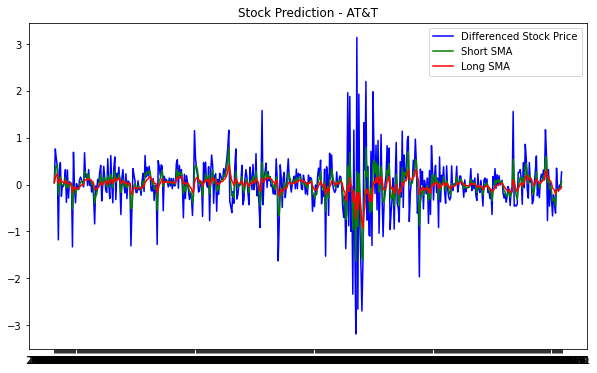

In [4]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(diff_T.index, diff_T, label='Differenced Stock Price',c='b')
ax.plot(short_exp_moving_average_T.index, short_exp_moving_average_T, label = 'Short SMA',c='g')
ax.plot(long_exp_moving_average_T.index, long_exp_moving_average_T, label = 'Long SMA',c='r')
ax.legend(loc='best')
ax.set_title('Stock Prediction - AT&T')
plt.show()

In [5]:
short_exp_moving_average_T.dropna(inplace=True)
long_exp_moving_average_T.dropna(inplace=True)

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
def rmse(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))

In [8]:
print('RMSE of AT&T for Short EWM {:.4f}'\
      .format(rmse(diff_T,short_exp_moving_average_T)))

RMSE of AT&T for Short EWM 0.3965


In [9]:
print('RMSE of AT&T for Long EWM {:.4f}'\
      .format(rmse(diff_T,long_exp_moving_average_T)))

RMSE of AT&T for Long EWM 0.5169


In all cases, it is quite obvious that the exponential moving average model outperforms the simple moving average in terms of RMSE metric. The reason of this superiority is about giving higher weight to recent observations in exponential moving average model. Whereas, all observations are equally weighted in simple moving average model.